In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string


In [89]:
movie = pd.read_csv('movie.csv')

In [90]:
movie.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [92]:
# تعديل البيانات لإزالة الفاصل "_" في تصنيف "rating"
movie['rating'] = movie['rating'].str.replace('-', '', regex=False)

# عرض بعض البيانات لتأكيد التعديل
print(movie[['show_id', 'rating']].head())


  show_id rating
0      s1   PG13
1      s2   TVMA
2      s3   TVMA
3      s4   TVMA
4      s5   TVMA


In [93]:
# ملء القيم الفارغة بسلاسل فارغة
movie.fillna('', inplace=True)


# عرض الأعمدة التي تحتوي على قيم مفقودة
print(movie.isnull().sum())
movie.describe(include='all').T


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1768,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,18,TVMA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:

# ملء القيم النصية الفارغة بسلسلة فارغة
columns_to_fill = ['title', 'director', 'cast', 'listed_in', 'description']
movie[columns_to_fill] = movie[columns_to_fill].fillna('')
# تأكد أنه لا توجد قيم مفقودة
print("\nبعد التنظيف:")
print(movie.isnull().sum())


بعد التنظيف:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [95]:
# دالة لتنظيف النص
def clean_text(text):
    text = text.lower()# تحويل الأحرف إلى صغيرة
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text) # إزالة علامات الترقيم
    text = re.sub(r'\s+', ' ', text)# إزالة المسافات الزائدة
    text = text.strip()# إزالة المسافات من البداية والنهاية
    return text

# تطبيق التنظيف على الأعمدة النصية المهمة
columns_to_clean = ['title', 'director', 'cast', 'listed_in', 'description']
for col in columns_to_clean:
    movie[col] = movie[col].apply(clean_text)


In [96]:
movie.shape

(8807, 12)

In [97]:
movie.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,zodiac,david fincher,mark ruffalo jake gyllenhaal robert downey jr ...,United States,"November 20, 2019",2007,R,158 min,cult movies dramas thrillers,a political cartoonist a crime reporter and a ...
8803,s8804,TV Show,zombie dumb,,,,"July 1, 2019",2018,TVY7,2 Seasons,kids tv korean tv shows tv comedies,while living alone in a spooky town a young gi...
8804,s8805,Movie,zombieland,ruben fleischer,jesse eisenberg woody harrelson emma stone abi...,United States,"November 1, 2019",2009,R,88 min,comedies horror movies,looking to survive in a world taken over by zo...
8805,s8806,Movie,zoom,peter hewitt,tim allen courteney cox chevy chase kate mara ...,United States,"January 11, 2020",2006,PG,88 min,children family movies comedies,dragged from civilian life a former superhero ...
8806,s8807,Movie,zubaan,mozez singh,vicky kaushal sarahjane dias raaghav chanana m...,India,"March 2, 2019",2015,TV14,111 min,dramas international movies music musicals,a scrappy but poor boy worms his way into a ty...


In [98]:
r,c = movie[movie['listed_in']=='(no listed_in listed)'].shape
print('The number of movie which do not have info about listed_in:',r)

The number of movie which do not have info about listed_in: 0


In [99]:
movie = movie[~(movie['listed_in']=='(no listed_in listed)')].reset_index(drop=True)

In [100]:
movie['listed_in'] = movie['listed_in'].str.replace('|',' ')

In [101]:
# تحديد الأعمدة النصية فقط (نوع object)
text_columns = movie.select_dtypes(include='object').columns

# إزالة & و , وتنظيف الفراغات الزائدة في كل الأعمدة النصية
for col in text_columns:
    movie[col] = movie[col].astype(str) \
                     .str.replace('&', '', regex=False) \
                     .str.replace(',', '', regex=False) \
                     .str.replace('  ', ' ', regex=False) \
                     .str.strip()


In [102]:
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,kirsten johnson,,United States,September 25 2021,2020,PG13,90 min,documentaries,as her father nears the end of his life filmma...
1,s2,TV Show,blood water,,ama qamata khosi ngema gail mabalane thabang m...,South Africa,September 24 2021,2021,TVMA,2 Seasons,international tv shows tv dramas tv mysteries,after crossing paths at a party a cape town te...
2,s3,TV Show,ganglands,julien leclercq,sami bouajila tracy gotoas samuel jouy nabiha ...,,September 24 2021,2021,TVMA,1 Season,crime tv shows international tv shows tv actio...,to protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,,,,September 24 2021,2021,TVMA,1 Season,docuseries reality tv,feuds flirtations and toilet talk go down amon...
4,s5,TV Show,kota factory,,mayur more jitendra kumar ranjan raj alam khan...,India,September 24 2021,2021,TVMA,2 Seasons,international tv shows romantic tv shows tv co...,in a city of coaching centers known to train i...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,zodiac,david fincher,mark ruffalo jake gyllenhaal robert downey jr ...,United States,November 20 2019,2007,R,158 min,cult movies dramas thrillers,a political cartoonist a crime reporter and a ...
8803,s8804,TV Show,zombie dumb,,,,July 1 2019,2018,TVY7,2 Seasons,kids tv korean tv shows tv comedies,while living alone in a spooky town a young gi...
8804,s8805,Movie,zombieland,ruben fleischer,jesse eisenberg woody harrelson emma stone abi...,United States,November 1 2019,2009,R,88 min,comedies horror movies,looking to survive in a world taken over by zo...
8805,s8806,Movie,zoom,peter hewitt,tim allen courteney cox chevy chase kate mara ...,United States,January 11 2020,2006,PG,88 min,children family movies comedies,dragged from civilian life a former superhero ...


In [103]:
counts=dict()

for i in movie.index:
    for g in movie.loc[i,'listed_in'].split(' '):
        if g not in counts:
            counts[g]=1
        else:
            counts[g]=counts[g]+1


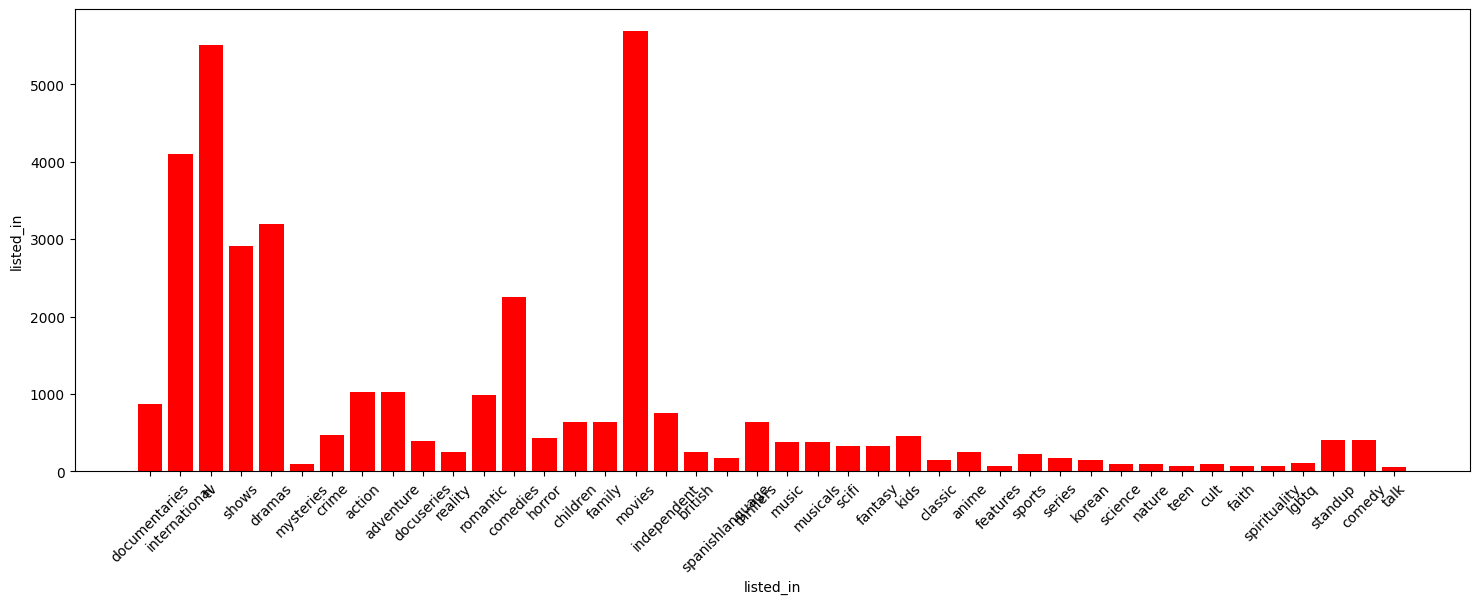

In [104]:
plt.figure(figsize=(18,6))
plt.bar(list(counts.keys()),counts.values(),color='r')
plt.xticks(rotation=45)
plt.xlabel('listed_in')
plt.ylabel('listed_in')
plt.show()

In [105]:
movie['listed_in']=movie['listed_in'].str.replace('Sci-Fi','Scifi')
movie['listed_in']=movie['listed_in'].str.replace('Stand-Up','StandUp')

In [106]:
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,kirsten johnson,,United States,September 25 2021,2020,PG13,90 min,documentaries,as her father nears the end of his life filmma...
1,s2,TV Show,blood water,,ama qamata khosi ngema gail mabalane thabang m...,South Africa,September 24 2021,2021,TVMA,2 Seasons,international tv shows tv dramas tv mysteries,after crossing paths at a party a cape town te...
2,s3,TV Show,ganglands,julien leclercq,sami bouajila tracy gotoas samuel jouy nabiha ...,,September 24 2021,2021,TVMA,1 Season,crime tv shows international tv shows tv actio...,to protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,,,,September 24 2021,2021,TVMA,1 Season,docuseries reality tv,feuds flirtations and toilet talk go down amon...
4,s5,TV Show,kota factory,,mayur more jitendra kumar ranjan raj alam khan...,India,September 24 2021,2021,TVMA,2 Seasons,international tv shows romantic tv shows tv co...,in a city of coaching centers known to train i...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,zodiac,david fincher,mark ruffalo jake gyllenhaal robert downey jr ...,United States,November 20 2019,2007,R,158 min,cult movies dramas thrillers,a political cartoonist a crime reporter and a ...
8803,s8804,TV Show,zombie dumb,,,,July 1 2019,2018,TVY7,2 Seasons,kids tv korean tv shows tv comedies,while living alone in a spooky town a young gi...
8804,s8805,Movie,zombieland,ruben fleischer,jesse eisenberg woody harrelson emma stone abi...,United States,November 1 2019,2009,R,88 min,comedies horror movies,looking to survive in a world taken over by zo...
8805,s8806,Movie,zoom,peter hewitt,tim allen courteney cox chevy chase kate mara ...,United States,January 11 2020,2006,PG,88 min,children family movies comedies,dragged from civilian life a former superhero ...


In [107]:
movie.to_csv('movie_cleaned.csv', index=False)
